# Introduction into Exploratory Data Analysis (EDA)

## Exploring Daily Statistics for Trending YouTube Videos

**WHY EDA?**  
Statistical analysis in order to solve tasks and confirm/reject hypotheses is a part of the Data Analyst Life Cycle.  
Initial investigations on your data are key in order to understand them - which again is necessary for further data analysis and future predictions.  
Within an EDA, you will perform initial investigations and aim for:  
- discover patterns 
- spot anomalies 
- test hypotheses 
- check assumptions 

**OBJECTIVE OF THIS NOTEBOOK**  
This notebook contains an example EDA on daily statistics for trending YouTube videos.
We will go through the cleaning and feature engineering part of an EDA as well as the hypotheses making and testing part.
After going through this code-along you will have an idea about
- how to approach an EDA
- the single parts of an EDA
- what lines of code are commonly used within an EDA
- how to build and answer hypotheses

**CONTENT OF THIS NOTEBOOK**  
In this notebook we will have a look at daily statistics for trending YouTube videos.  

The data as well as the data-descriptions are retrieved from [Kaggle](https://www.kaggle.com/datasnaek/youtube-new). The data was collected from Google's You Tube API using an open-source tool available on [Github](https://github.com/mitchelljy/Trending-YouTube-Scraper)
There you can find the following description of this data:  
"YouTube (the world-famous video sharing website) maintains a list of the top trending videos on the platform. According to Variety magazine, “To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes). Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously virile “Gangnam Style”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for."  

*What does trending mean?*  
According to [YouTube](https://support.google.com/youtube/answer/7239739?hl=en), trending helps viewers see what’s happening on YouTube and in the world. Trending aims to surface videos that a wide range of viewers would find interesting. Some trends are predictable, like a new song from a popular artist or a new movie trailer. Others are surprising, like a viral video. Trending isn’t personalized and displays the same list of trending videos in each country to all users.  
The list of trending videos is updated roughly every 15 minutes. With each update, videos may move up, down, or stay in the same position in the list.

Data are available for different countries as separate files, in this notebook we will use the daily statistics for Germany for the years 2017/2018.


**BUSINESS CASE**  
You work as Data Analyst for a music agency, which has a lot of prospective music stars under contract.  
The agency instructed you to give them an overview about how likely it is, that videos of their stars become trending videos on YouTube.  
They want to know, what number of views, likes, dislikes the most popular trending videos had in the past.    
Do music videos become trending videos at all? Which channels might be a good choice? When is a good time to publish a video?  

Questions about questions - and you should answer them.

## Let's get started

Set-up your working environment

In [59]:
# import the necessary libraries you need for your analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from collections import Counter
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px
import glob

## Understand your Data

As first part of an EDA it is important to find out what information is contained in the data set.  
We start by reading in our data and get some basic information for our dataset.  

In [60]:
glob.glob(r'Data/*csv')

['Data\\AAL_data.csv',
 'Data\\AAPL_data.csv',
 'Data\\AAP_data.csv',
 'Data\\ABBV_data.csv',
 'Data\\ABC_data.csv',
 'Data\\ABT_data.csv',
 'Data\\ACN_data.csv',
 'Data\\ADBE_data.csv',
 'Data\\ADI_data.csv',
 'Data\\ADM_data.csv',
 'Data\\ADP_data.csv',
 'Data\\ADSK_data.csv',
 'Data\\ADS_data.csv',
 'Data\\AEE_data.csv',
 'Data\\AEP_data.csv',
 'Data\\AES_data.csv',
 'Data\\AET_data.csv',
 'Data\\AFL_data.csv',
 'Data\\AGN_data.csv',
 'Data\\AIG_data.csv',
 'Data\\AIV_data.csv',
 'Data\\AIZ_data.csv',
 'Data\\AJG_data.csv',
 'Data\\AKAM_data.csv',
 'Data\\ALB_data.csv',
 'Data\\ALGN_data.csv',
 'Data\\ALK_data.csv',
 'Data\\ALLE_data.csv',
 'Data\\ALL_data.csv',
 'Data\\ALXN_data.csv',
 'Data\\AMAT_data.csv',
 'Data\\AMD_data.csv',
 'Data\\AME_data.csv',
 'Data\\AMGN_data.csv',
 'Data\\AMG_data.csv',
 'Data\\AMP_data.csv',
 'Data\\AMT_data.csv',
 'Data\\AMZN_data.csv',
 'Data\\ANDV_data.csv',
 'Data\\ANSS_data.csv',
 'Data\\ANTM_data.csv',
 'Data\\AON_data.csv',
 'Data\\AOS_data.csv

In [61]:
len(glob.glob(r'Data/*csv'))

509

In [62]:
Company_list = [ r'Data\\AAL_data.csv',
               r'Data\\AMZN_data.csv',
               r'Data\\GOOG_data.csv',
               r'Data\\MSFT_data.csv'
        ]

In [63]:
c_data = pd.DataFrame()

for file in Company_list:
    current_df = pd.read_csv(file)
    c_data = pd.concat([c_data, current_df], ignore_index=True)


In [64]:
c_data.shape

(4752, 7)

In [65]:
c1_data = pd.DataFrame()

for file in Company_list:
    current_df = pd.read_csv(file)
    c1_data = current_df._append(c1_data, ignore_index=True)


In [66]:
c1_data.shape

(4752, 7)

In [67]:
c_data.head(5)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [68]:
c_data['Name'].unique()

array(['AAL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

## Analysing change in price of the stock over time

In [69]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4752 entries, 0 to 4751
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    4752 non-null   object 
 1   open    4752 non-null   float64
 2   high    4752 non-null   float64
 3   low     4752 non-null   float64
 4   close   4752 non-null   float64
 5   volume  4752 non-null   int64  
 6   Name    4752 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 260.0+ KB


In [70]:
c_data['date'] = pd.to_datetime(c_data['date'])

In [71]:
cn_list = c_data['Name'].unique()
cn_list

array(['AAL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

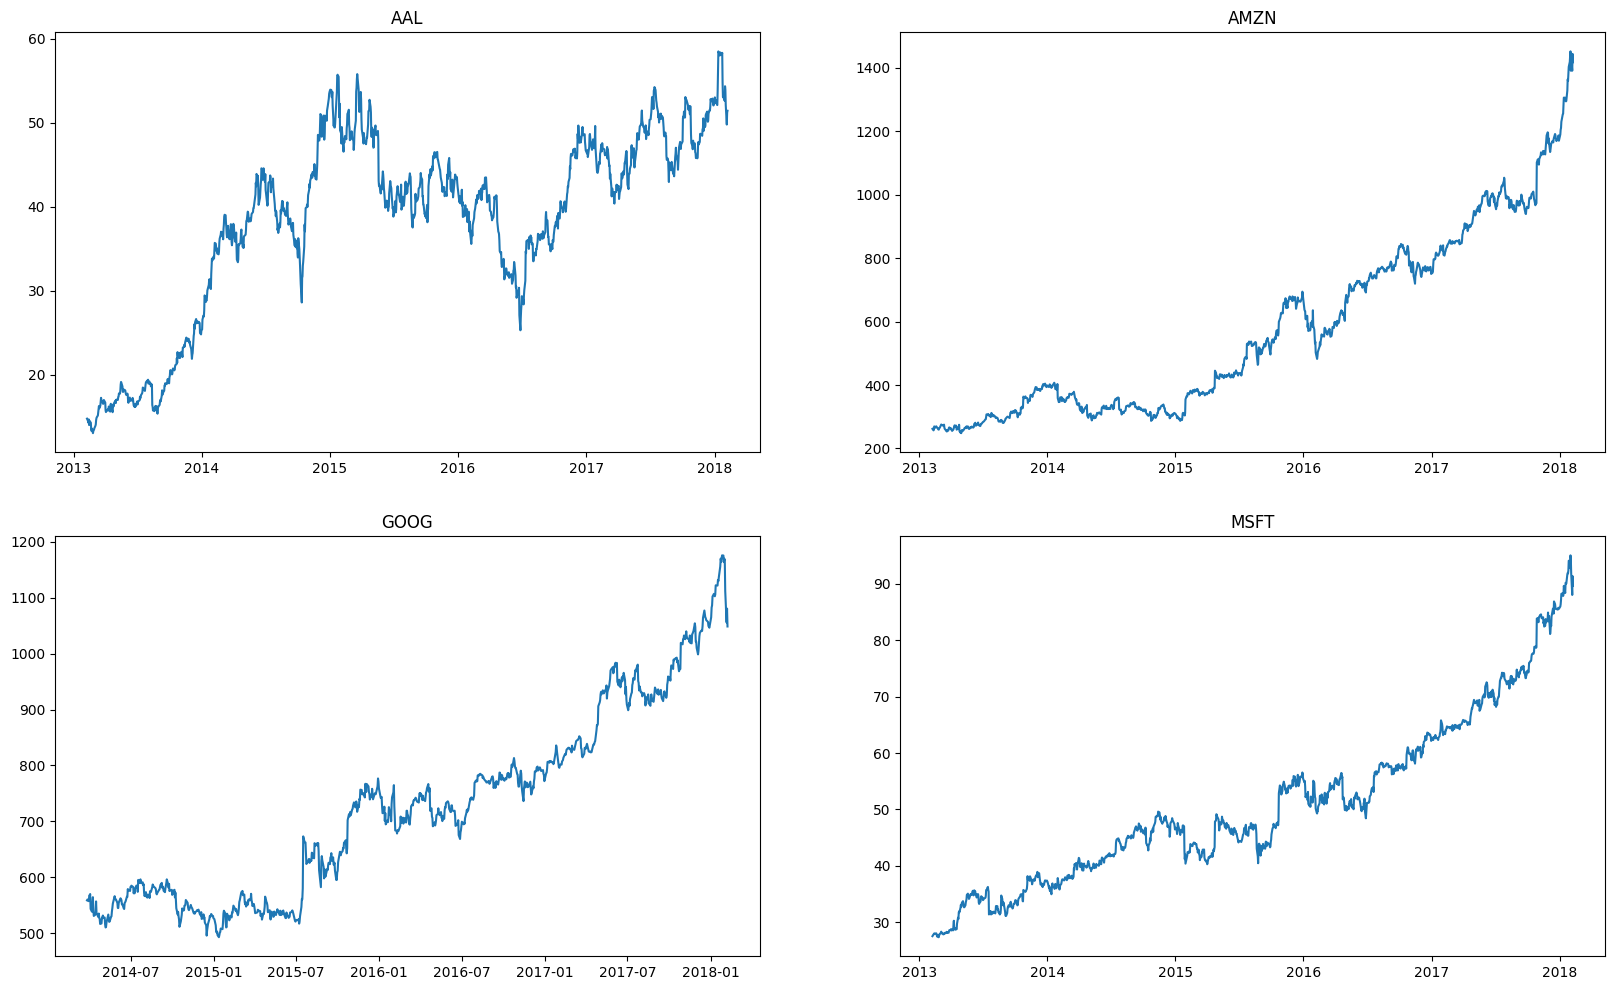

In [72]:
plt.figure(figsize=(20,12))

for index , company in enumerate(cn_list, 1):
    plt.subplot(2, 2, index)
    filter1 = c_data['Name'] == company
    df = c_data[filter1]
    plt.plot(df['date'], df['close'])
    plt.title(company)

## Analysing moving average of the stocks

In [73]:
c_data['close'].rolling(window=10).mean().head(15)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9     14.116
10    13.943
11    13.823
12    13.737
13    13.614
14    13.576
Name: close, dtype: float64

In [74]:
new_data = c_data.copy()

In [75]:
mavg_day = [10, 20, 50]

for i in mavg_day:
    new_data['close' + str(i)] = new_data['close'].rolling(i).mean()

In [76]:
new_data.tail(10)

,date,open,high,low,close,volume,Name,close10,close20,close50
4742,2018-01-25,92.465,93.240,91.9300,92.33,26383238,MSFT,90.393,88.6410,85.9292
4743,2018-01-26,93.120,94.060,92.5800,94.06,29172167,MSFT,90.991,89.0585,86.1318
4744,2018-01-29,95.140,95.450,93.7200,93.92,31569940,MSFT,91.423,89.4685,86.3292
4745,2018-01-30,93.300,93.660,92.1000,92.74,38635053,MSFT,91.862,89.8285,86.5244
4746,2018-01-31,93.750,95.400,93.5100,95.01,48756338,MSFT,92.349,90.2815,86.7606
4747,2018-02-01,94.790,96.070,93.5813,94.26,47227882,MSFT,92.765,90.6770,86.9978
4748,2018-02-02,93.640,93.970,91.5000,91.78,47867753,MSFT,92.943,90.9105,87.1828
4749,2018-02-05,90.560,93.240,88.0000,88.00,51031465,MSFT,92.582,90.9010,87.2684
4750,2018-02-06,86.890,91.475,85.2500,91.33,67998564,MSFT,92.525,91.0535,87.4328
4751,2018-02-07,90.490,91.770,89.2000,89.61,41107592,MSFT,92.304,91.1230,87.5598


In [77]:
new_data = new_data.set_index('date')

In [78]:
new_data

,open,high,low,close,volume,Name,close10,close20,close50
date,,,,,,,,,
2013-02-08,15.07,15.120,14.6300,14.75,8407500,AAL,NaN,NaN,NaN
2013-02-11,14.89,15.010,14.2600,14.46,8882000,AAL,NaN,NaN,NaN
2013-02-12,14.45,14.510,14.1000,14.27,8126000,AAL,NaN,NaN,NaN
2013-02-13,14.30,14.940,14.2500,14.66,10259500,AAL,NaN,NaN,NaN
2013-02-14,14.94,14.960,13.1600,13.99,31879900,AAL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT,92.765,90.6770,86.9978
2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT,92.943,90.9105,87.1828
2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT,92.582,90.9010,87.2684


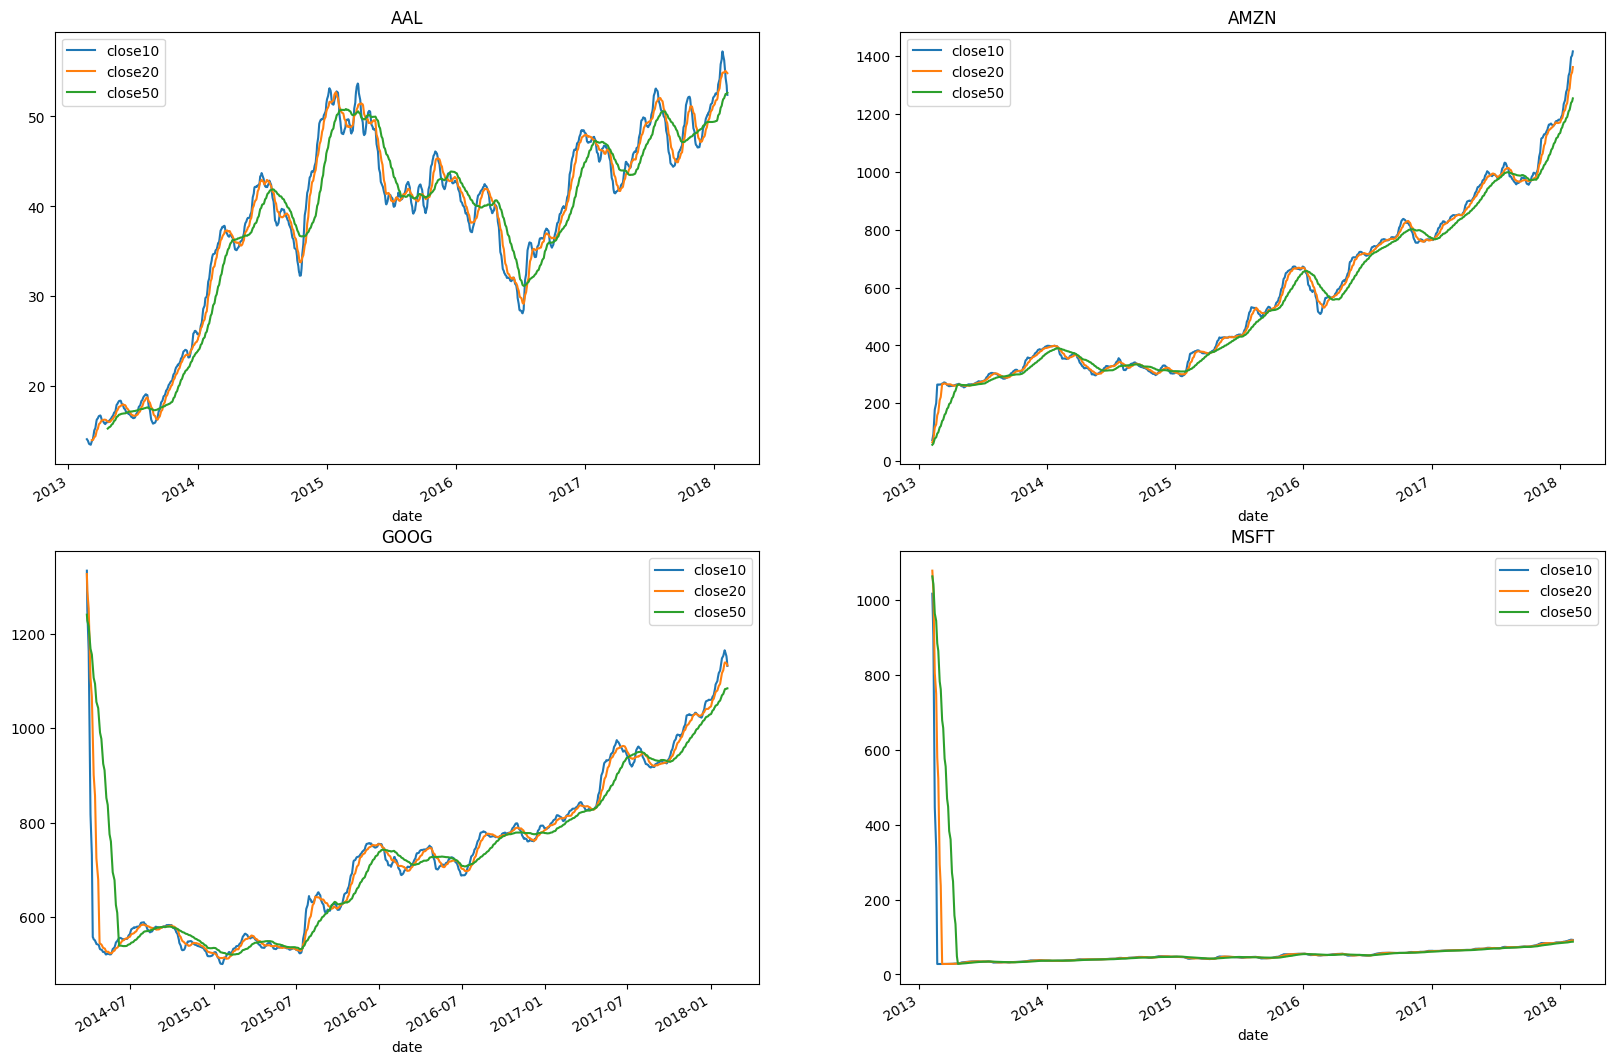

In [79]:
plt.figure(figsize=(20,14))

for index , company in enumerate(cn_list, 1):
    plt.subplot(2, 2, index)
    filter1 = new_data['Name'] == company
    df1 = new_data[filter1]
    df1[['close10', 'close20', 'close50']].plot(ax = plt.gca())
    plt.title(company)

## Observing Closing price change in Apple stock

In [80]:
apple_data = pd.read_csv(r'Data\\AAL_data.csv')

In [81]:
apple_data.head(4)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL


In [82]:
apple_data['date'] = pd.to_datetime(apple_data['date'])

In [83]:
apple_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [84]:
apple_data['Daily_return(in%)'] = apple_data['close'].pct_change()*100

In [85]:
apple_data.head(5)

,date,open,high,low,close,volume,Name,Daily_return(in%)
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,NaN
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,-1.966102
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,-1.313970
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2.733006
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,-4.570259


In [86]:
px.line(apple_data, x = "date", y = "Daily_return(in%)")

## Performing resampling Analysis

In [87]:
apple_data.head()

,date,open,high,low,close,volume,Name,Daily_return(in%)
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,NaN
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,-1.966102
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,-1.313970
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2.733006
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,-4.570259


In [88]:
apple_data.set_index('date', inplace= True)

In [89]:
apple_data.dtypes

open                 float64
high                 float64
low                  float64
close                float64
volume                 int64
Name                  object
Daily_return(in%)    float64
dtype: object

<Axes: xlabel='date'>

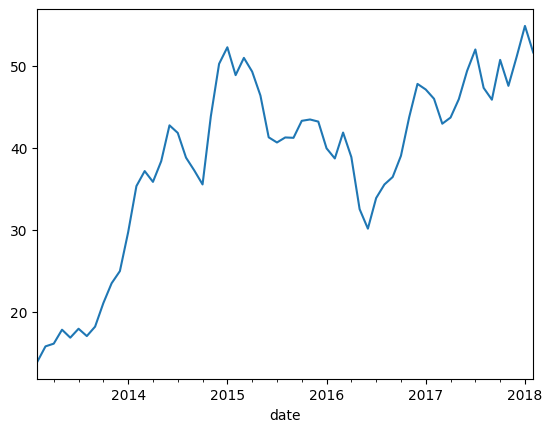

In [90]:
apple_data['close'].resample('ME').mean().plot()

<Axes: xlabel='date'>

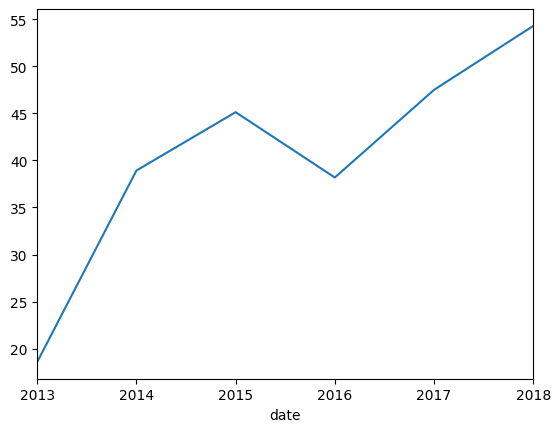

In [91]:
apple_data['close'].resample('YE').mean().plot()

<Axes: xlabel='date'>

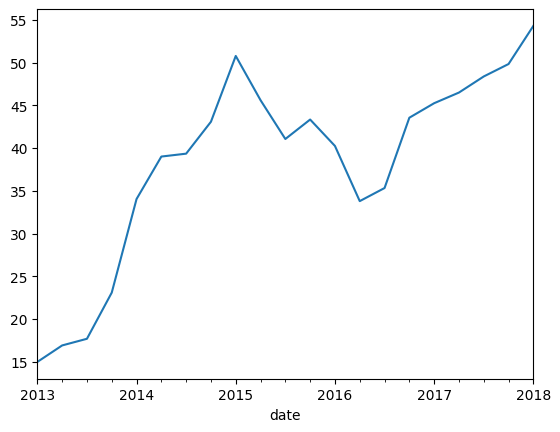

In [92]:
apple_data['close'].resample('QE').mean().plot()

## Perform Multi-Variant Analysis to understand Co-relation

In [93]:
Company_list

['Data\\\\AAL_data.csv',
 'Data\\\\AMZN_data.csv',
 'Data\\\\GOOG_data.csv',
 'Data\\\\MSFT_data.csv']

In [94]:
apple = pd.read_csv(Company_list[0])
amzn = pd.read_csv(Company_list[1])
goog = pd.read_csv(Company_list[2])
msft = pd.read_csv(Company_list[3])

In [95]:
closing_price = pd.DataFrame()

In [96]:
closing_price['apple_close'] = apple['close']
closing_price['amzn_close'] = amzn['close']
closing_price['goog_close'] = goog['close']
closing_price['msft_close'] = msft['close']

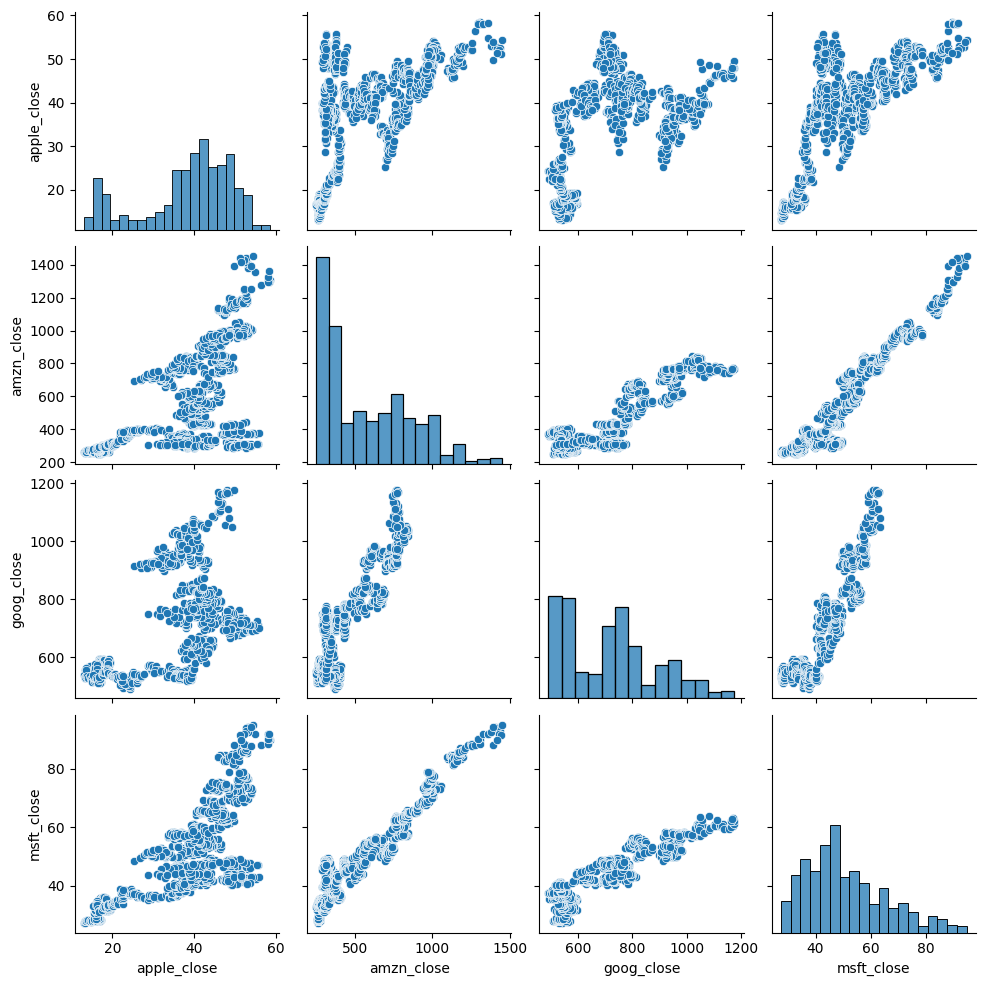

In [97]:
sns.pairplot(closing_price)

In [98]:
closing_price.corr()

,apple_close,amzn_close,goog_close,msft_close
apple_close,1.000000,0.566225,0.487288,0.711324
amzn_close,0.566225,1.000000,0.888456,0.955977
goog_close,0.487288,0.888456,1.000000,0.907011
msft_close,0.711324,0.955977,0.907011,1.000000


<Axes: >

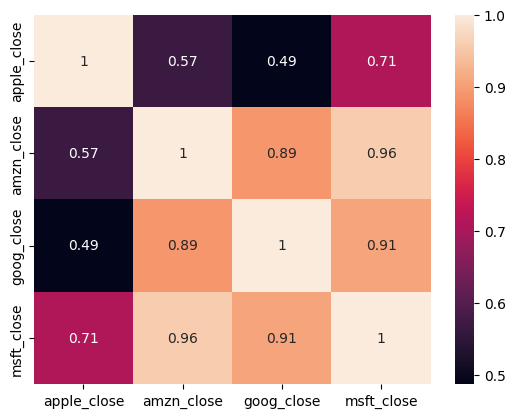

In [99]:
sns.heatmap(closing_price.corr() , annot = True)

## Performing Co-relation Analysis

In [100]:
closing_price['apple_close']

0       14.75
1       14.46
2       14.27
3       14.66
4       13.99
        ...  
1254    53.88
1255    52.10
1256    49.76
1257    51.18
1258    51.40
Name: apple_close, Length: 1259, dtype: float64

In [101]:
closing_price['apple_close'].shift(1)

0         NaN
1       14.75
2       14.46
3       14.27
4       14.66
        ...  
1254    54.32
1255    53.88
1256    52.10
1257    49.76
1258    51.18
Name: apple_close, Length: 1259, dtype: float64

In [102]:
(closing_price['apple_close'] - closing_price['apple_close'].shift(1)) / closing_price['apple_close'].shift(1) * 100

0            NaN
1      -1.966102
2      -1.313970
3       2.733006
4      -4.570259
          ...   
1254   -0.810015
1255   -3.303638
1256   -4.491363
1257    2.853698
1258    0.429855
Name: apple_close, Length: 1259, dtype: float64

In [103]:
for col in closing_price.columns:
    closing_price[col + 'pct_change'] = (closing_price[col] - closing_price[col].shift(1)) / closing_price[col].shift(1) * 100


In [104]:
closing_price

,apple_close,amzn_close,goog_close,msft_close,apple_closepct_change,amzn_closepct_change,goog_closepct_change,msft_closepct_change
0,14.75,261.95,558.46,27.55,NaN,NaN,NaN,NaN
1,14.46,257.21,559.99,27.86,-1.966102,-1.809506,0.273968,1.125227
2,14.27,258.70,556.97,27.88,-1.313970,0.579293,-0.539295,0.071788
3,14.66,269.47,567.16,28.03,2.733006,4.163123,1.829542,0.538020
4,13.99,269.24,567.00,28.04,-4.570259,-0.085353,-0.028211,0.035676
...,...,...,...,...,...,...,...,...
1254,53.88,1390.00,NaN,94.26,-0.810015,-4.196734,NaN,-0.789391
1255,52.10,1429.95,NaN,91.78,-3.303638,2.874101,NaN,-2.631021
1256,49.76,1390.00,NaN,88.00,-4.491363,-2.793804,NaN,-4.118544
1257,51.18,1442.84,NaN,91.33,2.853698,3.801439,NaN,3.784091


In [105]:
closing_price.columns

Index(['apple_close', 'amzn_close', 'goog_close', 'msft_close',
       'apple_closepct_change', 'amzn_closepct_change', 'goog_closepct_change',
       'msft_closepct_change'],
      dtype='object')

In [107]:
closing_pct = closing_price[['apple_closepct_change', 'amzn_closepct_change', 'goog_closepct_change',
       'msft_closepct_change']]

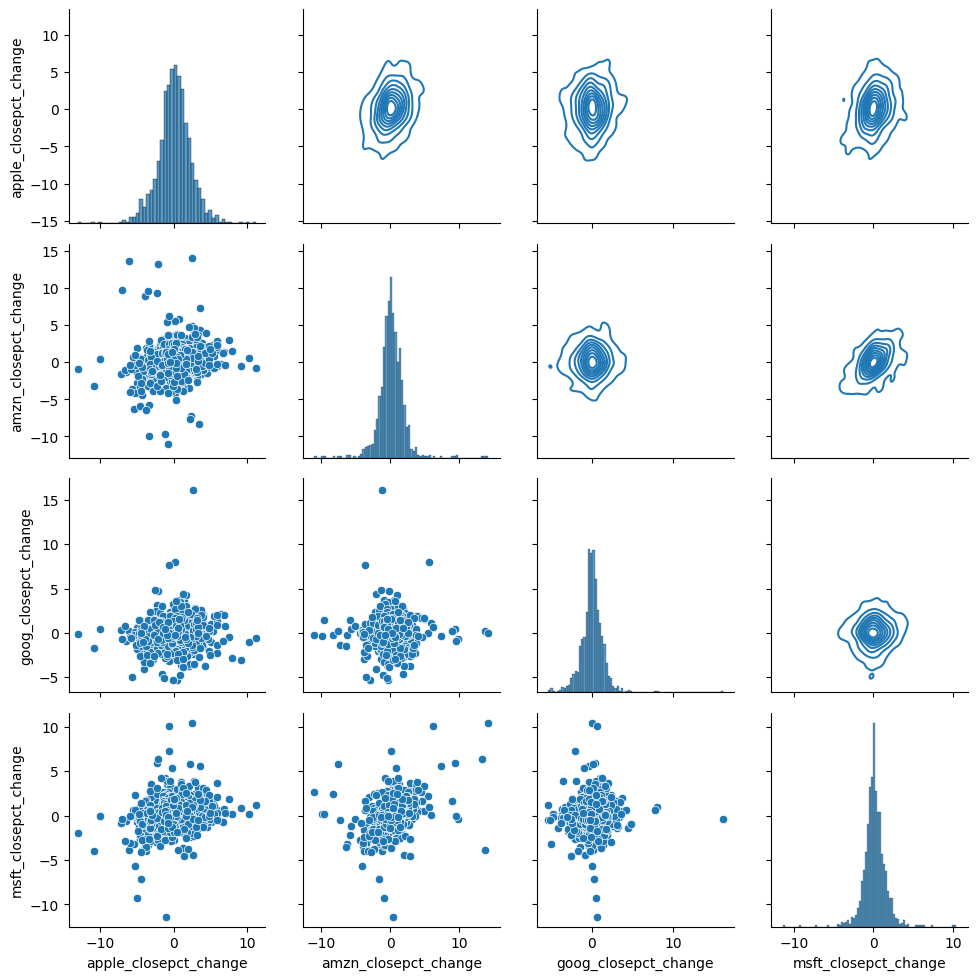

In [111]:
g = sns.PairGrid(data = closing_pct)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)
